In [1]:
# Import the necessary libraries
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets from the CSV files
us_elections_2020_hate_speech = pd.read_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_cleaned.csv")
dynamically_generated_hate_speech_dataset = pd.read_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_cleaned.csv")
convabuse = pd.read_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/convabuse_cleaned.csv")
online_abusive_attacks = pd.read_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_cleaned.csv")

Mounted at /content/drive


# U.S. Elections 2020 Hate Speech

In [ ]:
# Get the head of each dataset
us_elections_2020_hate_speech.head()

,Trump,Biden,West,HOF
0,0.0,4.0,0.0,Non-Hateful
1,0.0,4.0,0.0,Non-Hateful
2,1.0,2.0,0.0,Non-Hateful
3,4.0,2.0,0.0,Non-Hateful
4,2.0,0.0,0.0,Non-Hateful


In [ ]:
# Get the numeric features of the us_elections_2020_hate_speech dataset
us_elections_2020_hate_speech_numeric = us_elections_2020_hate_speech.select_dtypes(include=[np.number])
us_elections_2020_hate_speech_numeric.head()

,Trump,Biden,West
0,0.0,4.0,0.0
1,0.0,4.0,0.0
2,1.0,2.0,0.0
3,4.0,2.0,0.0
4,2.0,0.0,0.0


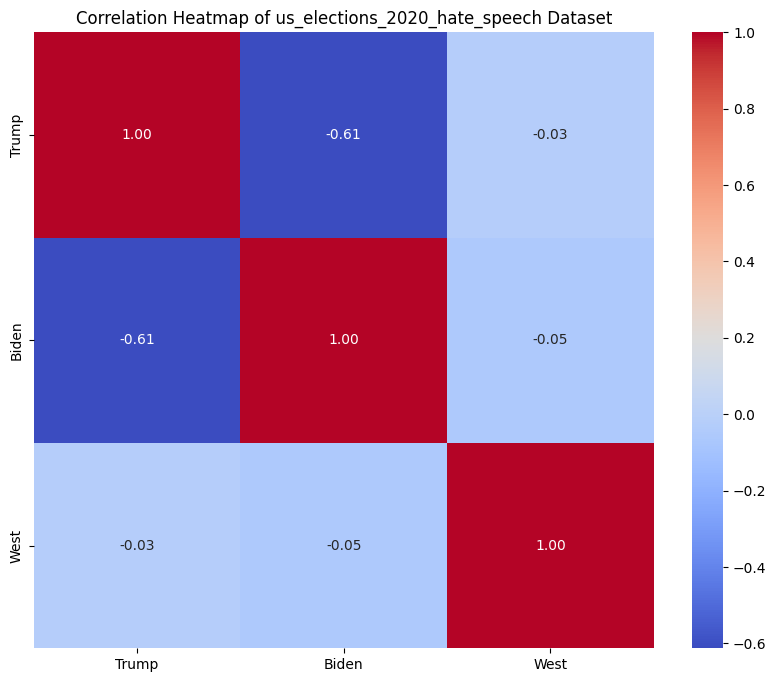

In [ ]:
# Get the correlation heatmap of the us_elections_2020_hate_speech dataset using numeric features only
plt.figure(figsize=(10, 8))
sns.heatmap(us_elections_2020_hate_speech_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of us_elections_2020_hate_speech Dataset")
plt.show()

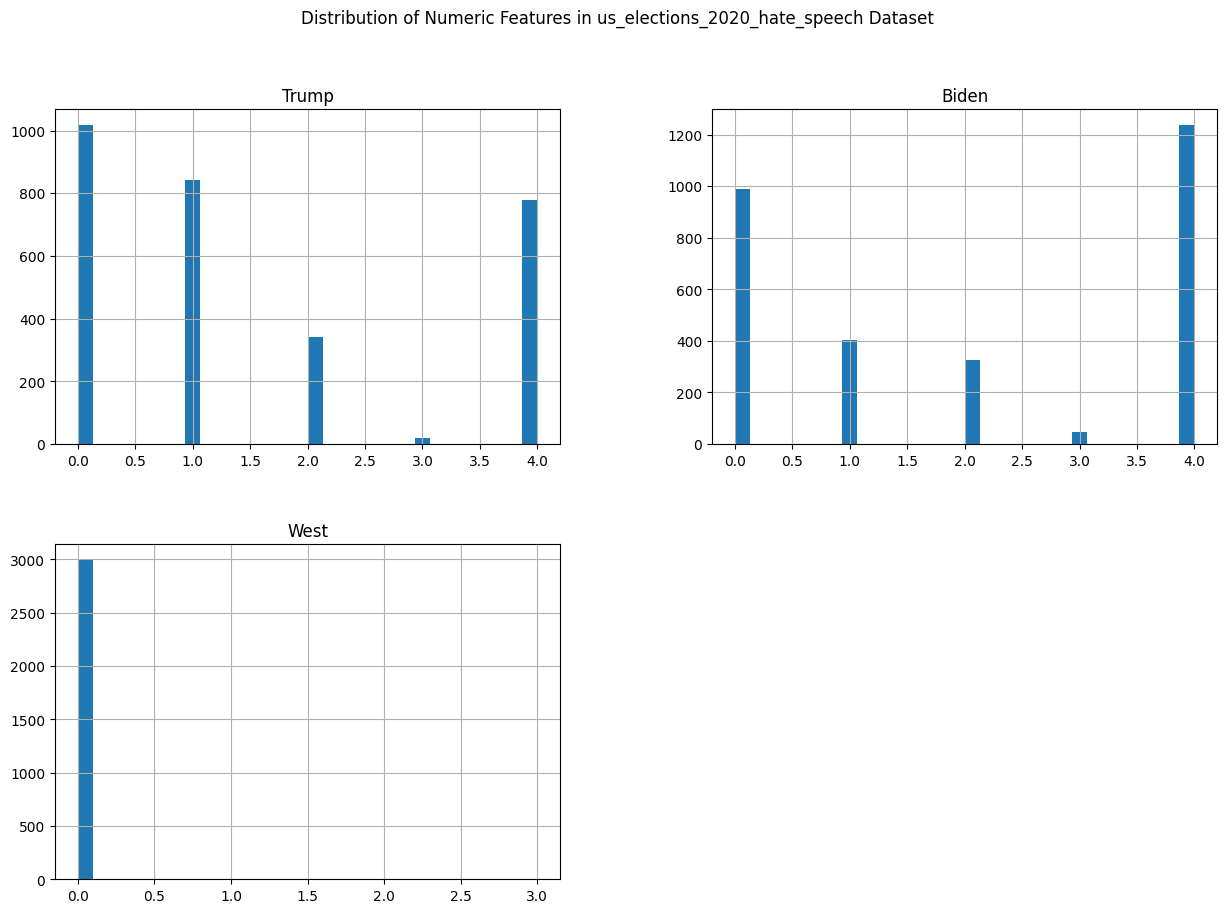

In [ ]:
# Get a distribution plot of all numeric features in the us_elections_2020_hate_speech dataset
us_elections_2020_hate_speech_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in us_elections_2020_hate_speech Dataset")
plt.show()

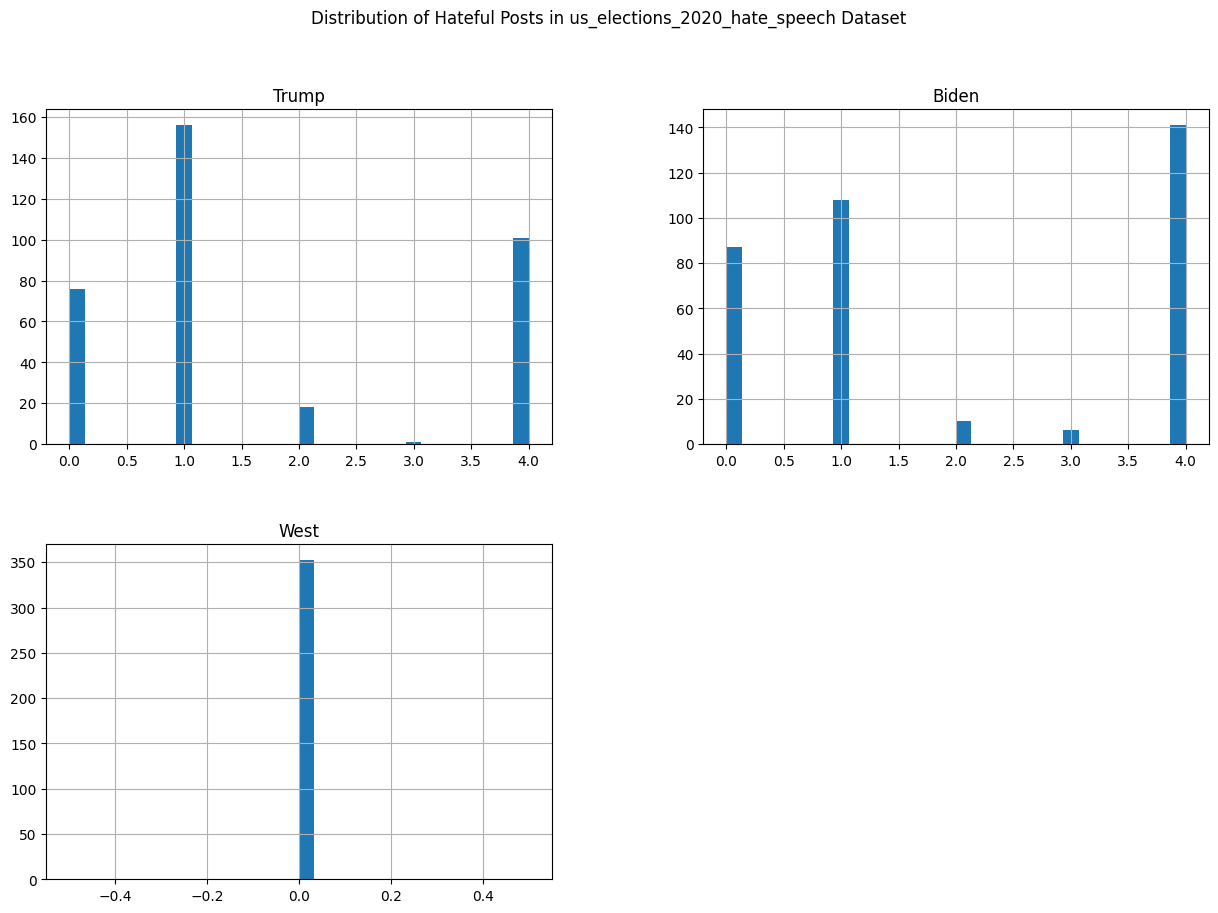

In [ ]:
# Group by HOF
hate_results = us_elections_2020_hate_speech[us_elections_2020_hate_speech['HOF'] == 'Hateful']

# Get a distribution plot of hateful posts in the us_elections_2020_hate_speech dataset
hate_results.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Hateful Posts in us_elections_2020_hate_speech Dataset")
plt.show()

In [ ]:
us_elections_2020_hate_speech[us_elections_2020_hate_speech['West'] != 0]

,Trump,Biden,West,HOF
462,0.0,0.0,3.0,Non-Hateful
521,0.0,0.0,2.0,Non-Hateful
1667,4.0,0.0,3.0,Non-Hateful
2059,0.0,0.0,1.0,Non-Hateful
2226,0.0,0.0,2.0,Non-Hateful
2293,0.0,0.0,3.0,Non-Hateful
2433,0.0,0.0,2.0,Non-Hateful
2558,1.0,4.0,1.0,Non-Hateful
2993,1.0,0.0,3.0,Non-Hateful


In [ ]:
# Output the dataframe as a CSV file
us_elections_2020_hate_speech.to_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_cleaned1.csv", index=False)

# Dynamically Generated Hate Speech Dataset

In [ ]:
dynamically_generated_hate_speech_dataset.head()

,label,type,target,level,annotator
0,hate,unclear,notgiven,original,3
1,hate,unclear,notgiven,original,3
2,hate,unclear,notgiven,original,18
3,hate,unclear,notgiven,original,16
4,hate,unclear,notgiven,original,7


In [ ]:
# Get the unique values of the type column
dynamically_generated_hate_speech_dataset["type"].unique()

array(['unclear', 'none', 'derogation', 'animosity', 'dehumanization',
       'threatening', 'support'], dtype=object)

In [ ]:
# Get the unique values of the "label" feature
dynamically_generated_hate_speech_dataset["label"].unique()

array(['hate', 'nothate'], dtype=object)

In [ ]:
# Change the hate speech labels to binary values
dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].replace({"hate": 1, "nothate": 0})

/tmp/ipython-input-4208641788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].replace({"hate": 1, "nothate": 0})


In [ ]:
# Get the unique values of the "label" column
dynamically_generated_hate_speech_dataset["label"].unique()

array([1, 0])

In [ ]:
# Convert the "label" feature to integer type
dynamically_generated_hate_speech_dataset["label"] = dynamically_generated_hate_speech_dataset["label"].astype(np.number)

/usr/local/lib/python3.12/dist-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


In [ ]:
# Get the unique values of the type column in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset["type"].unique()

array(['unclear', 'none', 'derogation', 'animosity', 'dehumanization',
       'threatening', 'support'], dtype=object)

In [ ]:
# Replace "unclear" and "none" with 0, "derogation", "dehumanization", "animosity", and "threatening" with -1, and "support" with 1 in the "type" column
dynamically_generated_hate_speech_dataset["type"] = dynamically_generated_hate_speech_dataset["type"].replace({
    "unclear": 0,
    "none": 0,
    "derogation": -1,
    "dehumanization": -1,
    "animosity": -1,
    "threatening": -1,
    "support": 1
})

/tmp/ipython-input-4162786069.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dynamically_generated_hate_speech_dataset["type"] = dynamically_generated_hate_speech_dataset["type"].replace({


In [ ]:
# Get the unique values of the level column in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset["level"].unique()

array(['original', 'perturbation'], dtype=object)

In [ ]:
# Get the count of original data in the "level" column
dynamically_generated_hate_speech_dataset["level"].value_counts()

,count
level,
original,26095
perturbation,15049


In [ ]:
dynamically_generated_hate_speech_dataset["target"].value_counts()

,count
target,
none,18969
notgiven,7110
wom,2035
bla,1961
jew,1096
...,...
"trans, lgbtq",1
"asi, non.white, african",1
"mus, bla, immig, non.white",1


In [ ]:
# Convert the target column to a string type
dynamically_generated_hate_speech_dataset["target"] = dynamically_generated_hate_speech_dataset["target"].astype(str)

In [ ]:
# Get all values with a comma in the target column and call them unique_targets
unique_targets = [id for id in dynamically_generated_hate_speech_dataset["target"] if "," in id]
unique_targets

['dis, gay',
 'mus, arab, other.religion',
 'mus, jew',
 'bla, asi',
 'bla, gay',
 'bla, immig',
 'for, immig',
 'bla, mixed.race',
 'pol, eastern.europe',
 'for, immig',
 'dis, gay',
 'bla.wom, bla.man',
 'mus, arab',
 'asi, asi.chin',
 'asi.south, asi.pak',
 'trans, gay, gay.wom, bis',
 'arab, asi.chin',
 'dis, wom',
 'mus, jew',
 'wom, mus.wom',
 'gay, gay.wom',
 'trans, gendermin',
 'bla, mixed.race',
 'asi, asi.chin',
 'trans, gendermin',
 'mixed.race, non.white',
 'mus, arab',
 'trans, gendermin',
 'bla.wom, asi.chin',
 'asi.south, arab',
 'dis, wc',
 'dis, wc',
 'dis, mus, wc',
 'trans, asi.wom',
 'trans, for',
 'trans, gay',
 'bla, trans, gay',
 'bla, trans',
 'dis, for',
 'mus, trans',
 'dis, bla, trans, mixed.race, gay',
 'dis, gay',
 'dis, bla',
 'dis, bla',
 'dis, asi.man',
 'mixed.race, gay',
 'wom, bla.wom',
 'trans, wom',
 'mus, asi.pak',
 'bla, mixed.race',
 'bla, ethnic.minority',
 'bla, asi, non.white',
 'dis, ref',
 'gendermin, gay.wom, gay.man',
 'arab, african',
 '

In [ ]:
# Remove sensitive targets, such as "hitler" and "nazis"
sensitive_targets = ["hitler", "nazis", "other.glorification"]
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset[~dynamically_generated_hate_speech_dataset["target"].isin(sensitive_targets)]
dynamically_generated_hate_speech_dataset["target"].value_counts()

,count
target,
none,18969
notgiven,7110
wom,2035
bla,1961
jew,1096
...,...
"bla, asi.east, hispanic",1
"jew, indig",1
"trav, arab",1


In [ ]:
# Get the count of np.nan values in the target variable
len(dynamically_generated_hate_speech_dataset[dynamically_generated_hate_speech_dataset['target'] == np.nan])

0

In [ ]:
# Use a for loop to replace "target" values of "nan", "none", "notgiven", and "notargetrecorded" with "none"
target_values = ["notgiven", "notargetrecorded"]

for i in range(len(dynamically_generated_hate_speech_dataset['target'])):
    # Convert to string for consistent comparison if values might be mixed types
    if str(dynamically_generated_hate_speech_dataset['target'].iloc[i]).lower() in [str(val).lower() for val in target_values]:
        dynamically_generated_hate_speech_dataset['target'].iloc[i] = "none"

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dynamically_generated_hate_speech_dataset['target'].iloc[i] = "none"
/tmp/ipython-input-2153680470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dynamically_generated_hate_speech_dataset['target'].iloc[i] = "none"
/tmp/ipython-input-2153680470.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are 

In [ ]:
dynamically_generated_hate_speech_dataset["target"].value_counts()

,count
target,
none,26216
wom,2035
bla,1961
jew,1096
mus,1002
...,...
"dis, bla, hispanic",1
"wom, immig",1
"asi, asi.chin, asi.wom",1


In [ ]:
# Get multiple targets which contain a period
multiple_targets = [id for id in dynamically_generated_hate_speech_dataset["target"] if "." in id]

# Remove targets that are already in the unique_targets list
multiple_targets = [id for id in multiple_targets if id not in unique_targets]

# Get the unique values of multiple_targets
multiple_targets = list(set(multiple_targets))
multiple_targets

['non.white',
 'asi.pak',
 'other.religion',
 'gay.man',
 'asi.chin',
 'other.national',
 'ethnic.minority',
 'gay.wom',
 'asi.man',
 'bla.wom',
 'mixed.race',
 'indig.wom',
 'asi.wom',
 'bla.man',
 'non.white.wom',
 'asi.east',
 'old.people',
 'asi.south',
 'mus.wom',
 'eastern.europe']

In [ ]:
# Get common target values (which are not in unique_targets)
common_targets = dynamically_generated_hate_speech_dataset["target"].value_counts()
common_targets = common_targets[~common_targets.index.isin(unique_targets)]
common_targets = common_targets[~common_targets.index.isin(multiple_targets)]
common_targets

,count
target,
none,26216
wom,2035
bla,1961
jew,1096
mus,1002
trans,792
gay,724
immig,672
dis,489


In [ ]:
# Create a list of values referring to race or ethnicity
race_or_ethnicity_values = [
    "bla",
    "indig",
    "arab",
    "african",
    "hispanic",
    "asi",
    "russian",
    "eastern.europe",
    "ethnic.minority",
    "mixed",
    "pol",
    "trav"
]

# Create a list of values referring to gender
gender_values = ["wom"]

# Create a list of values referring to religion
religion_values = [
    "mus",
    "jew"
]

# Create a list of values referring to LGBTQ
lgbtq_values = [
    "gay",
    "bis",
    "gendermin",
    "lgbtq"
]

# Create a list of values referring to nationality
nationality_values = [
    "other.national",
    "for",
    "asylum",
    "immig"
]

# Create a list of values referring to age
age_values = [
    "old"
]

# Create a list of values referring to disability
disability_values = [
    "dis"
]

# Create a list of values referring to no target
none_values = ["none"]

# Create a list of values referring to class
class_values = ["wc"]


In [ ]:
# Create default columns for gender, race or ethnicity, religion, sexual orientation, gender identity, and age with default value of 0
dynamically_generated_hate_speech_dataset["race_or_ethnicity"] = 0
dynamically_generated_hate_speech_dataset["gender"] = 0
dynamically_generated_hate_speech_dataset["religion"] = 0
dynamically_generated_hate_speech_dataset["lgbtq"] = 0
dynamically_generated_hate_speech_dataset["nationality"] = 0
dynamically_generated_hate_speech_dataset["age"] = 0
dynamically_generated_hate_speech_dataset["disability"] = 0
dynamically_generated_hate_speech_dataset["class"] = 0
dynamically_generated_hate_speech_dataset["none"] = 0

In [ ]:
# Loop through all entries to check if the target column contains a race or ethnicity
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    # Check if the target is in the predefined list of race or ethnicity values, and if so, change the race_or_ethnicity value to 1
    if row["target"] in race_or_ethnicity_values:
        dynamically_generated_hate_speech_dataset.at[index, "race_or_ethnicity"] = 1

# Loop through all entries to check if the target column contains a gender value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in gender_values:
        dynamically_generated_hate_speech_dataset.at[index, "gender"] = 1

# Loop through all entries to check if the target column contains a religion value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in religion_values:
        dynamically_generated_hate_speech_dataset.at[index, "religion"] = 1

# Loop through all entries to check if the target column contains an lgbtq value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in lgbtq_values:
        dynamically_generated_hate_speech_dataset.at[index, "lgbtq"] = 1

# Loop through all entries to check if the target column contains a nationality value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in nationality_values:
        dynamically_generated_hate_speech_dataset.at[index, "nationality"] = 1

# Loop through all entries to check if the target column contains an age value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in age_values:
        dynamically_generated_hate_speech_dataset.at[index, "age"] = 1

# Loop through all entries to check if the target column contains a disability value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in disability_values:
        dynamically_generated_hate_speech_dataset.at[index, "disability"] = 1

# Loop through all entries to check if the target column contains a class value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in class_values:
        dynamically_generated_hate_speech_dataset.at[index, "class"] = 1

# Loop through all entries to check if the target column contains a none value
for index, row in dynamically_generated_hate_speech_dataset.iterrows():
    if row["target"] in ["none"]:
        dynamically_generated_hate_speech_dataset.at[index, "none"] = 1

dynamically_generated_hate_speech_dataset["none"].value_counts()

In [ ]:
# Get the count of entries in the dataset
len(dynamically_generated_hate_speech_dataset)

In [ ]:
# Get the value counts of the new columns
for col in ["race_or_ethnicity", "gender", "religion", "lgbtq", "nationality", "age", "disability", "class", "none"]:
    print(f"Value counts for {col}:")
    print(dynamically_generated_hate_speech_dataset[col].value_counts())
    print()

In [ ]:
# Drop the target column as it is no longer needed
dynamically_generated_hate_speech_dataset = dynamically_generated_hate_speech_dataset.drop(columns=["target"]).reset_index(drop=True)
dynamically_generated_hate_speech_dataset.head()

In [ ]:
# Get the numeric columns
dynamically_generated_hate_speech_dataset_numeric = dynamically_generated_hate_speech_dataset.select_dtypes(include=[np.number])

In [ ]:
# Create a correlation heatmap of the new columns
plt.figure(figsize=(10, 8))
sns.heatmap(dynamically_generated_hate_speech_dataset_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Dynamically Generated Hate Speech Dataset")
plt.show()

In [ ]:
# Plot a histogram of all numeric features in the dynamically_generated_hate_speech_dataset
dynamically_generated_hate_speech_dataset.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Dynamically Generated Hate Speech Dataset")
plt.show()

In [ ]:
# Output the dataframe as a CSV file
dynamically_generated_hate_speech_dataset.to_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_cleaned1.csv", index=False)

# Convabuse

In [ ]:
convabuse.head()

In [ ]:
# List out the columns of the convabuse dataset
for col in convabuse.columns:
    print(col)

In [ ]:
# Remove the "conv_id", "prev_agent", "prev_user", "agent", and "user" columns as they are not needed
convabuse = convabuse.drop(columns=["conv_id", "prev_agent", "prev_user", "agent", "user"]).reset_index(drop=True)
convabuse.head()

In [ ]:
# Remove the terms "type." and "target." from each column name
convabuse.columns = [re.sub(r'^is_abuse\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^type\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^target\.', '', col) for col in convabuse.columns]
convabuse.columns = [re.sub(r'^direction\.', '', col) for col in convabuse.columns]
convabuse.head()

In [ ]:
# Rename the numeric column names to more understandable names
convabuse = convabuse.rename(columns={
    "1": "Not Abusive",
    "0": "Ambiguous",
    "-1": "Abusive",
    "-2": "Very Abusive",
    "-3": "Very Strongly Abusive"
})

convabuse.head()

In [ ]:
# Get the numeric features of the convabuse dataset
convabuse_numeric = convabuse.select_dtypes(include=[np.number])
convabuse_numeric.head()

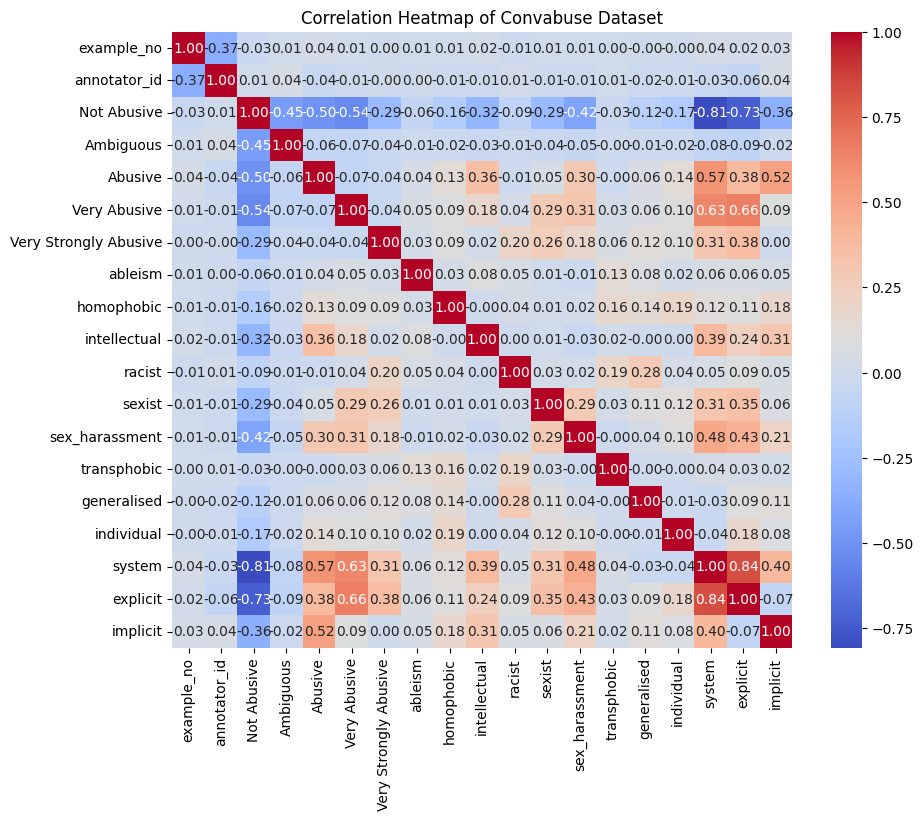

In [ ]:
# Create a correlation heatmap of the convabuse dataset
plt.figure(figsize=(10, 8))
sns.heatmap(convabuse_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Convabuse Dataset")
plt.show()

In [ ]:
# Output the dataframe as a CSV file
convabuse.to_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/convabuse_cleaned1.csv", index=False)

# Online Abusive Attacks Dataset

In [3]:
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,Top Desc Word #1: women,Top Desc Word #2: love,Top Desc Word #3: news,Top Desc Word #4: account,Top Desc Word #5: feminist,Top Desc Word #6: official,Top Desc Word #7: follow,Top Desc Word #8: products,Top Desc Word #9: tweets,Top Desc Word #10: womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [4]:
# Remove the term "Top Desc Word " from the column names
online_abusive_attacks.columns = [re.sub(r'^Top Desc Word ', '', col) for col in online_abusive_attacks.columns]
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,#1: women,#2: love,#3: news,#4: account,#5: feminist,#6: official,#7: follow,#8: products,#9: tweets,#10: womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [5]:
# For each of the final 10 columns, use a for loop to remove any leading "#i: " values from the column names
for i in range(1, 11):
    online_abusive_attacks.columns = [re.sub(rf'^#{i}: ', '', col) for col in online_abusive_attacks.columns]

online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,Num replies with high Toxicity,Num replies with high Severe_Toxicity,Num replies with high Identity_Attack,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [6]:
# Remove the phrase "Num replies with" from the column names
online_abusive_attacks.columns = [re.sub(r'^Num replies with ', '', col) for col in online_abusive_attacks.columns]
online_abusive_attacks.head()

,Filename,followers_count,friends_count,verified,statuses_count,following,user_mentions,high Toxicity,high Severe_Toxicity,high Identity_Attack,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,1000200192,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,1000485576771080000,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,...,No,No,No,No,No,No,No,No,No,No
2,1000485576771080000,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,...,No,No,No,No,No,No,No,No,No,No
3,1000485576771080000,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,...,No,No,No,No,No,No,No,No,No,No
4,1000485576771080000,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [7]:
# List out each column name in the online_abusive_attacks dataset
for col in online_abusive_attacks.columns:
    print(col)

Filename
followers_count
friends_count
verified
statuses_count
following
user_mentions
high Toxicity
high Severe_Toxicity
high Identity_Attack
high Insult
high Profanity
high Threat
high other attr
women
love
news
account
feminist
official
follow
products
tweets
womens


In [8]:
# Remove the Filename column as it is not needed
online_abusive_attacks = online_abusive_attacks.drop(columns=["Filename"]).reset_index(drop=True)
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No
1,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,0.0,...,No,No,No,No,No,No,No,No,No,No
2,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,1.0,...,No,No,No,No,No,No,No,No,No,No
3,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,2.0,...,No,No,No,No,No,No,No,No,No,No
4,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,0.0,...,No,No,No,No,No,No,No,No,No,No


In [9]:
# Check for NaN values for each column in the online_abusive_attacks dataset
for col in online_abusive_attacks.columns:
    print(f"{col}: {online_abusive_attacks[col].isna().sum()} NaN values")

followers_count: 0 NaN values
friends_count: 0 NaN values
verified: 0 NaN values
statuses_count: 0 NaN values
following: 0 NaN values
user_mentions: 0 NaN values
high Toxicity: 0 NaN values
high Severe_Toxicity: 0 NaN values
high Identity_Attack: 0 NaN values
high Insult: 0 NaN values
high Profanity: 0 NaN values
high Threat: 0 NaN values
high other attr: 0 NaN values
women: 0 NaN values
love: 0 NaN values
news: 0 NaN values
account: 0 NaN values
feminist: 0 NaN values
official: 0 NaN values
follow: 0 NaN values
products: 0 NaN values
tweets: 0 NaN values
womens: 0 NaN values


In [10]:
# Encode the final ten columns as binary integer values
for col in online_abusive_attacks.columns[-10:]:
    # If the value of for each entry in the column is "No", change it to 0, otherwise change it to 1
    online_abusive_attacks[col] = online_abusive_attacks[col].apply(lambda x: 0 if x == "No" else 1)

online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,39632.0,15271.0,No,71848.0,No,Yes,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20606.0,9472.0,No,167382.0,No,Yes,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20445.0,9396.0,No,165314.0,No,Yes,1.0,0.0,17.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20506.0,9430.0,No,166164.0,No,Yes,3.0,0.0,9.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,20583.0,9469.0,No,167488.0,No,Yes,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Encode the verified column as binary integer values where "No" is 0 and "Yes" is 1
online_abusive_attacks["verified"] = online_abusive_attacks["verified"].apply(lambda x: 0 if x == "No" else 1)
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,39632.0,15271.0,0,71848.0,No,Yes,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20606.0,9472.0,0,167382.0,No,Yes,1.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20445.0,9396.0,0,165314.0,No,Yes,1.0,0.0,17.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20506.0,9430.0,0,166164.0,No,Yes,3.0,0.0,9.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,20583.0,9469.0,0,167488.0,No,Yes,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
online_abusive_attacks.select_dtypes(include=[object])

,following,user_mentions
0,No,Yes
1,No,Yes
2,No,Yes
3,No,Yes
4,No,Yes
...,...,...
2360,No,No
2361,No,No
2362,No,Yes
2363,No,Yes


In [12]:
# Get the numeric features of the online_abusive_attacks dataset
online_abusive_attacks_numeric = online_abusive_attacks.select_dtypes(include=[np.number])
online_abusive_attacks_numeric.head()

,followers_count,friends_count,verified,statuses_count,high Toxicity,high Severe_Toxicity,high Identity_Attack,high Insult,high Profanity,high Threat,...,women,love,news,account,feminist,official,follow,products,tweets,womens
0,39632.0,15271.0,0,71848.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20606.0,9472.0,0,167382.0,1.0,0.0,2.0,0.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20445.0,9396.0,0,165314.0,1.0,0.0,17.0,1.0,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20506.0,9430.0,0,166164.0,3.0,0.0,9.0,2.0,33.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,20583.0,9469.0,0,167488.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
for col in online_abusive_attacks.columns:
    print(col)

followers_count
friends_count
verified
statuses_count
following
user_mentions
high Toxicity
high Severe_Toxicity
high Identity_Attack
high Insult
high Profanity
high Threat
high other attr
women
love
news
account
feminist
official
follow
products
tweets
womens


In [17]:
# Take the sum of high Toxicity, high Severe_Toxicity, high Identity_Attack, high Insult, high Profanity, high Threat, and high other attr to calculate a new column "Toxicity"
online_abusive_attacks["Toxicity"] = online_abusive_attacks["high Toxicity"] + online_abusive_attacks["high Severe_Toxicity"] + online_abusive_attacks["high Identity_Attack"] + online_abusive_attacks["high Insult"] + online_abusive_attacks["high Profanity"] + online_abusive_attacks["high Threat"] + online_abusive_attacks["high other attr"]

# Drop the aforementioned columns now that Toxicity has been calculated
online_abusive_attacks = online_abusive_attacks.drop(columns=["high Toxicity", "high Severe_Toxicity", "high Identity_Attack", "high Insult", "high Profanity", "high Threat", "high other attr"]).reset_index(drop=True)
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,No,Yes,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,No,Yes,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,No,Yes,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,No,Yes,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,No,Yes,0,0,0,0,0,0,0,0,0,0,7.0


In [19]:
# Integer encode "following" and "user_mentions" where "Yes" is 1 and "No" is 0
online_abusive_attacks["following"] = online_abusive_attacks["following"].apply(lambda x: 0 if x == "No" else 1)
online_abusive_attacks["user_mentions"] = online_abusive_attacks["user_mentions"].apply(lambda x: 0 if x == "No" else 1)
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,0,1,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,0,1,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,0,1,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,0,1,0,0,0,0,0,0,0,0,0,0,7.0


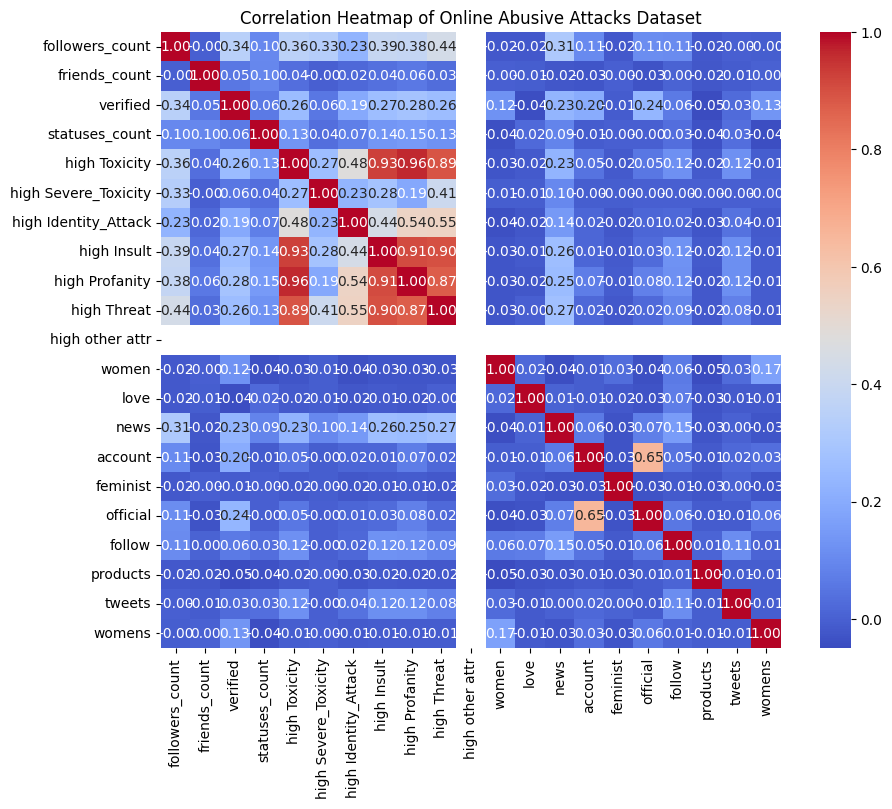

In [20]:
# Create a correlation heatmap of the online_abusive_attacks dataset
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Dataset")
plt.show()

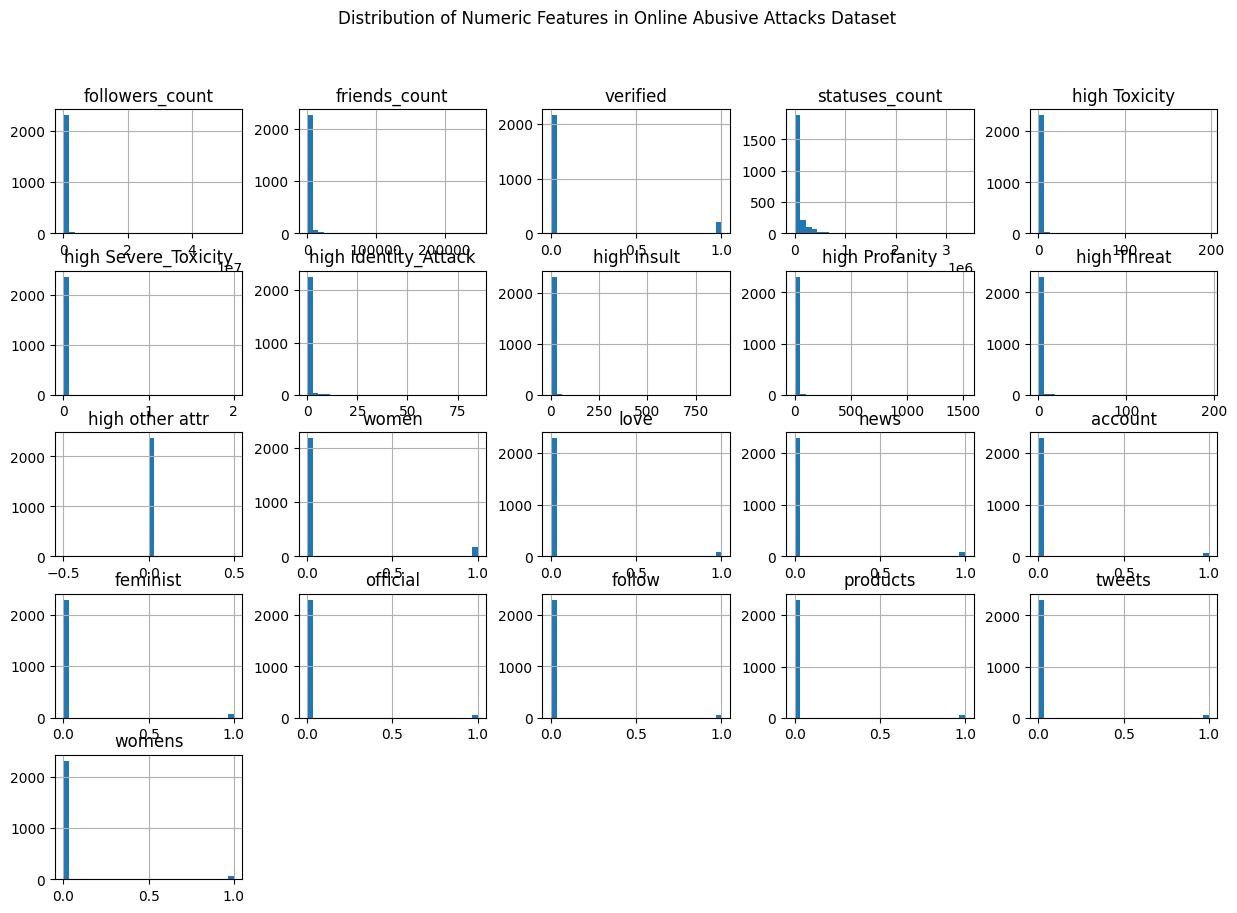

In [21]:
# Generate a histogram of all numeric features in the online_abusive_attacks dataset
online_abusive_attacks_numeric.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Online Abusive Attacks Dataset")
plt.show()

In [25]:
# Get the numeric features of the X_columns and y_columns
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [26]:
online_abusive_attacks_X.head()

,followers_count,friends_count,verified,statuses_count,following,user_mentions,women,love,news,account,feminist,official,follow,products,tweets,womens
0,39632.0,15271.0,0,71848.0,0,1,0,0,0,0,0,0,0,0,0,0
1,20606.0,9472.0,0,167382.0,0,1,0,0,0,0,0,0,0,0,0,0
2,20445.0,9396.0,0,165314.0,0,1,0,0,0,0,0,0,0,0,0,0
3,20506.0,9430.0,0,166164.0,0,1,0,0,0,0,0,0,0,0,0,0
4,20583.0,9469.0,0,167488.0,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
online_abusive_attacks_y.head()

,Toxicity
0,0.0
1,13.0
2,45.0
3,49.0
4,7.0


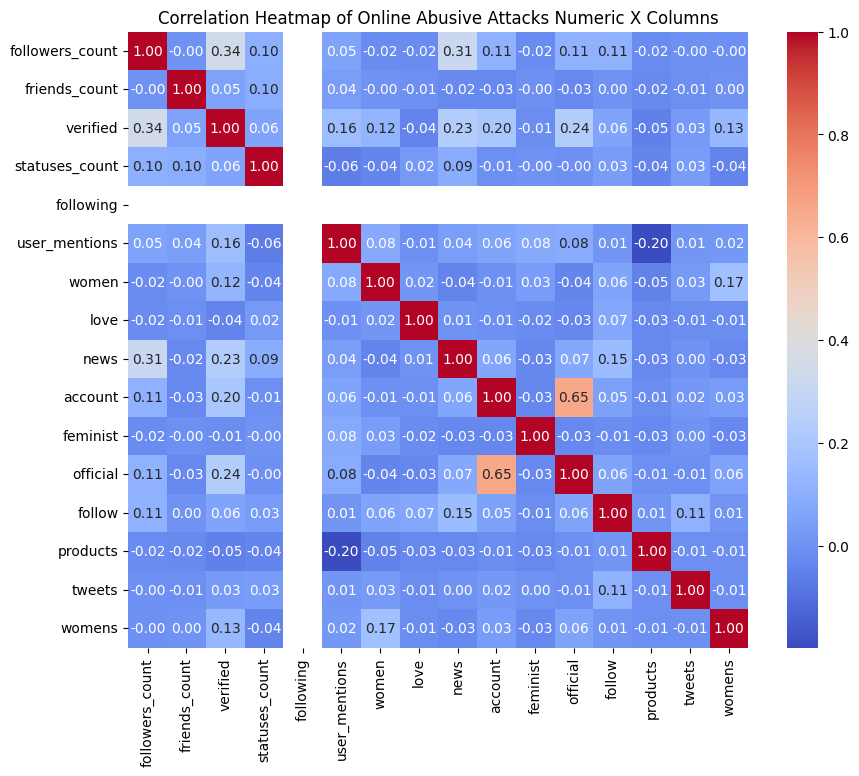

In [28]:
# Get a correlation heatmap of the numeric X_columns only
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks_X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Numeric X Columns")
plt.show()


In [31]:
# Drop the following and user mentions columns
online_abusive_attacks = online_abusive_attacks.drop(columns=["following", "user_mentions"])

In [32]:
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,0,0,0,0,0,0,0,0,0,0,7.0


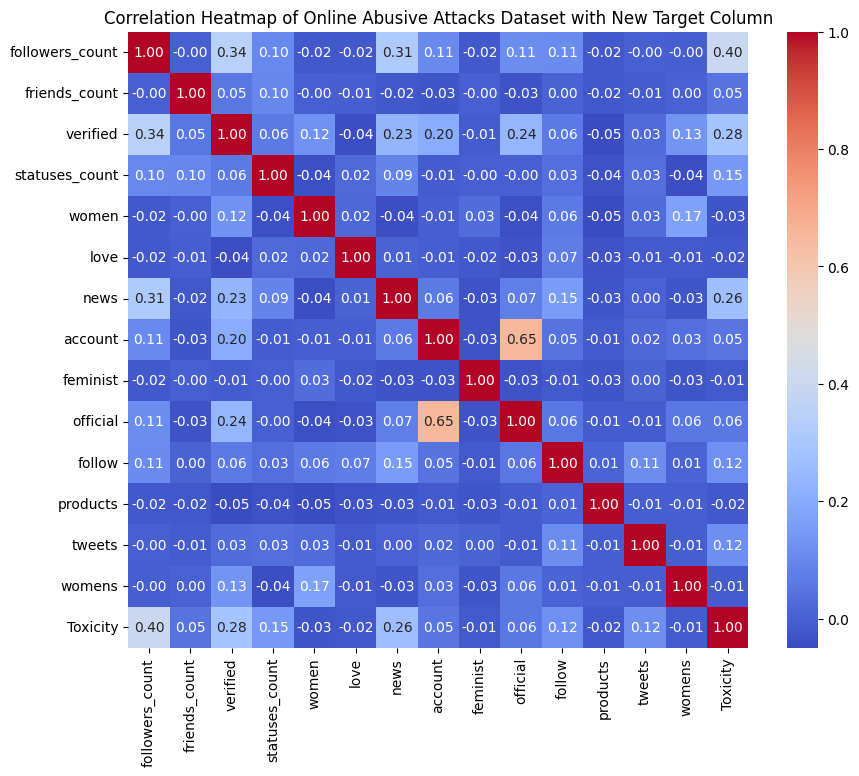

In [33]:
# Create a correlation heatmap of the new dataset
plt.figure(figsize=(10, 8))
sns.heatmap(online_abusive_attacks.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Online Abusive Attacks Dataset with New Target Column")
plt.show()

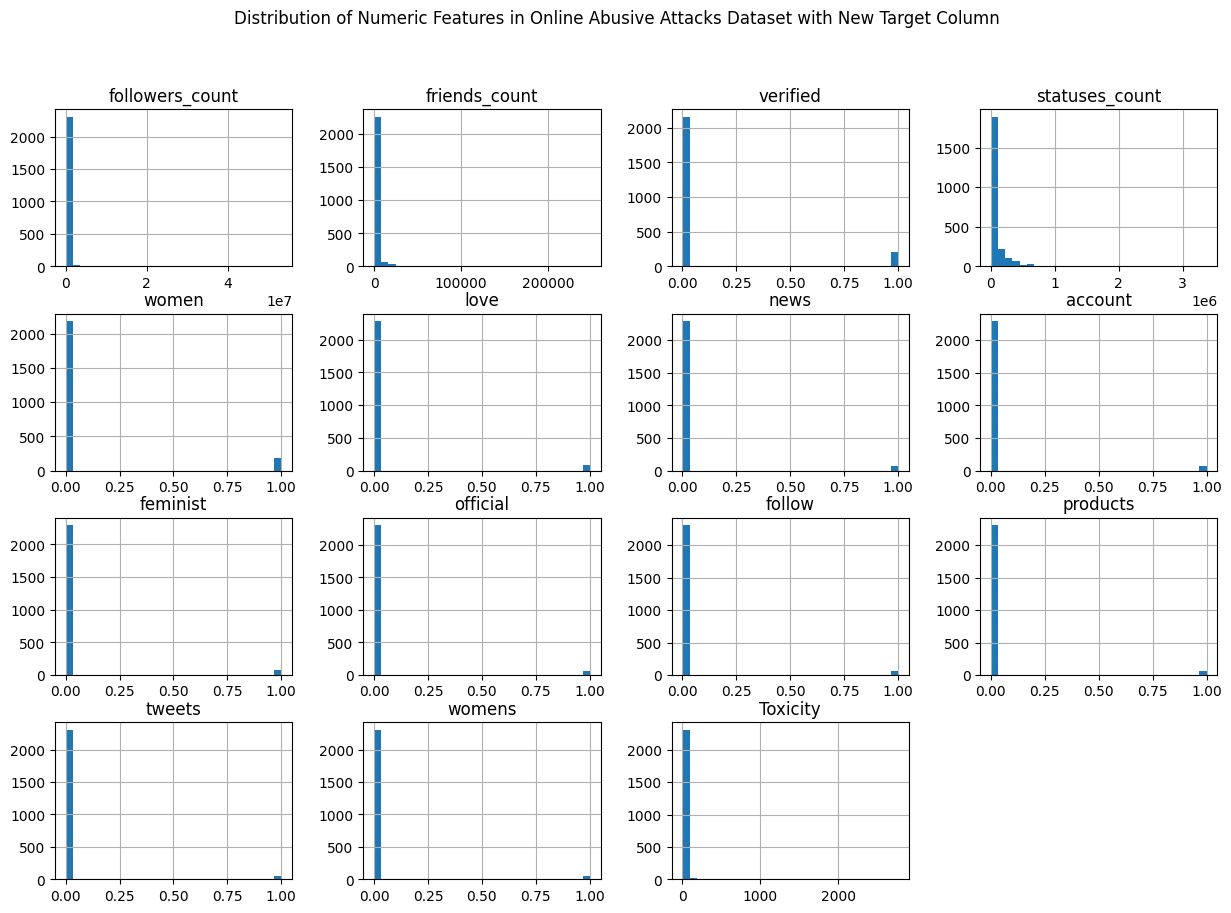

In [34]:
# Create a histogram of all numeric features in the new dataset
online_abusive_attacks.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Features in Online Abusive Attacks Dataset with New Target Column")
plt.show()

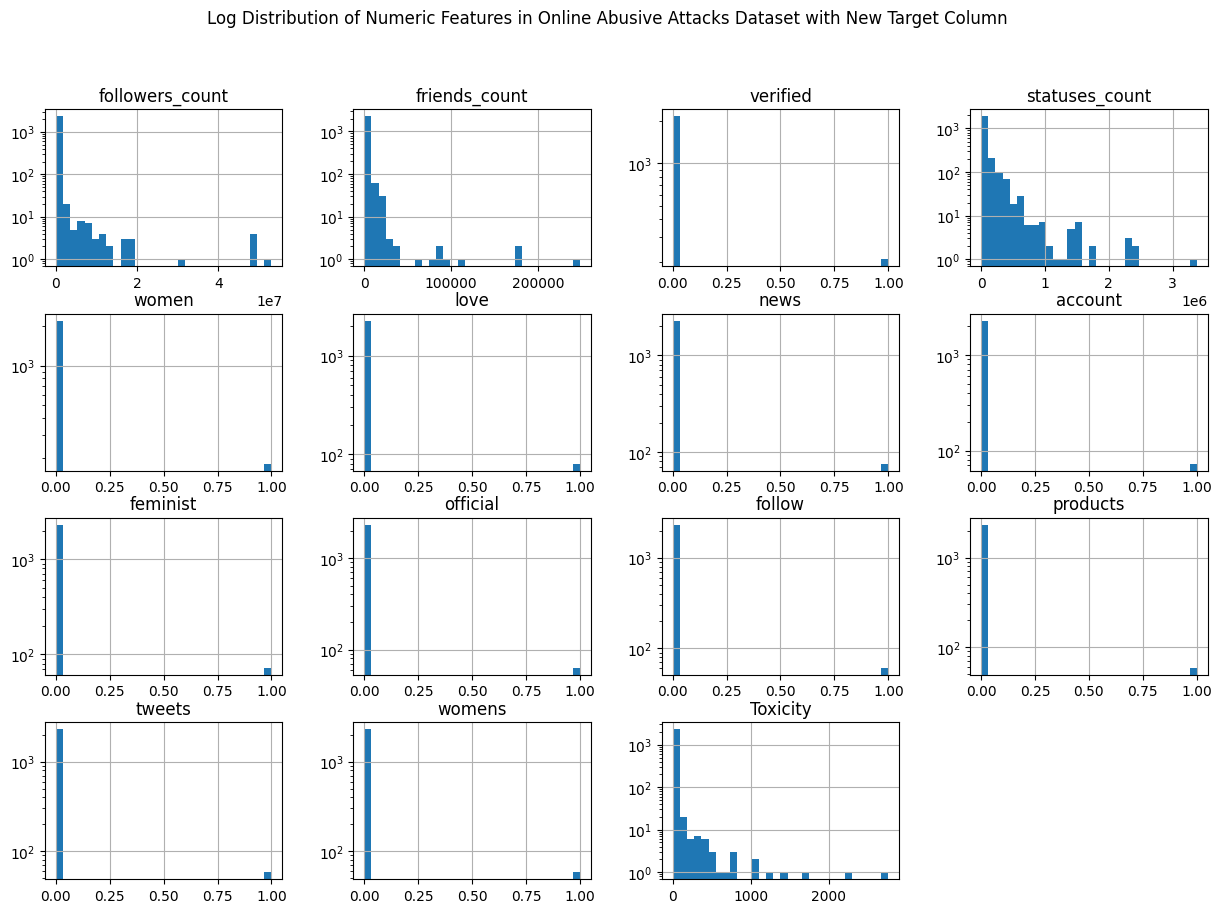

In [35]:
# Plot a log histogram of all numeric features in the balanced dataset
online_abusive_attacks.hist(bins=30, figsize=(15, 10), log=True)
plt.suptitle("Log Distribution of Numeric Features in Online Abusive Attacks Dataset with New Target Column")
plt.show()

In [36]:
# Output the dataframe as a CSV file
online_abusive_attacks.to_csv("/content/drive/MyDrive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_cleaned1.csv", index=False)